# Perceptron Inner Working

## Overview

The perceptron is a simple neural network model designed for binary classification. It mimics the way a biological neuron works, taking multiple inputs, processing them, and producing an output. Below is an illustration of the inner workings of a perceptron.

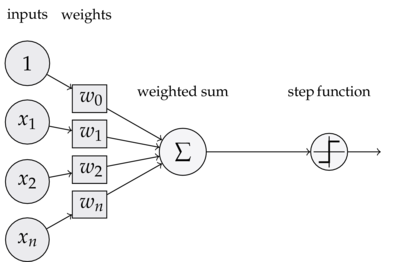


## Structure


1. **Inputs:** The perceptron receives multiple input signals (features) represented by x₁, x₂, ..., xₙ.

2. **Weights:** Each input is associated with a weight (w₁, w₂, ..., wₙ), determining its influence on the perceptron's decision.

3. **Weighted Sum:** The weighted sum of inputs (∑(xᵢ ⋅ wᵢ)) is calculated.

4. **Bias:** A bias term (b) is added to the weighted sum, acting as a threshold.

5. **Activation Function:** The result is passed through an activation function (commonly a step function), producing the final output (y).

## Learning Process

1. **Initialization:** Weights and bias are initialized with small random values.

2. **Training:** During training, the perceptron adjusts weights and bias based on the error between predicted and true labels.

3. **Decision Boundary:** The learned weights and bias define a hyperplane acting as a decision boundary in the input space.


## Limitations

- **Linear Separability:** The perceptron can only learn linearly separable functions.

- **Sensitivity to Scaling:** It may be sensitive to the scaling of input features.

Implementaion of Perceptron Model

In [42]:
# Importing necessary libraries

import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For statistical data visualization
from sklearn.datasets import load_breast_cancer  # Breast Cancer dataset
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #For model evaluation

In [43]:
# Set the Seaborn theme
sns.set_theme()

In [44]:
# Load breast cancer dataset
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Data Visualization

In [46]:
# Convert data into dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [47]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


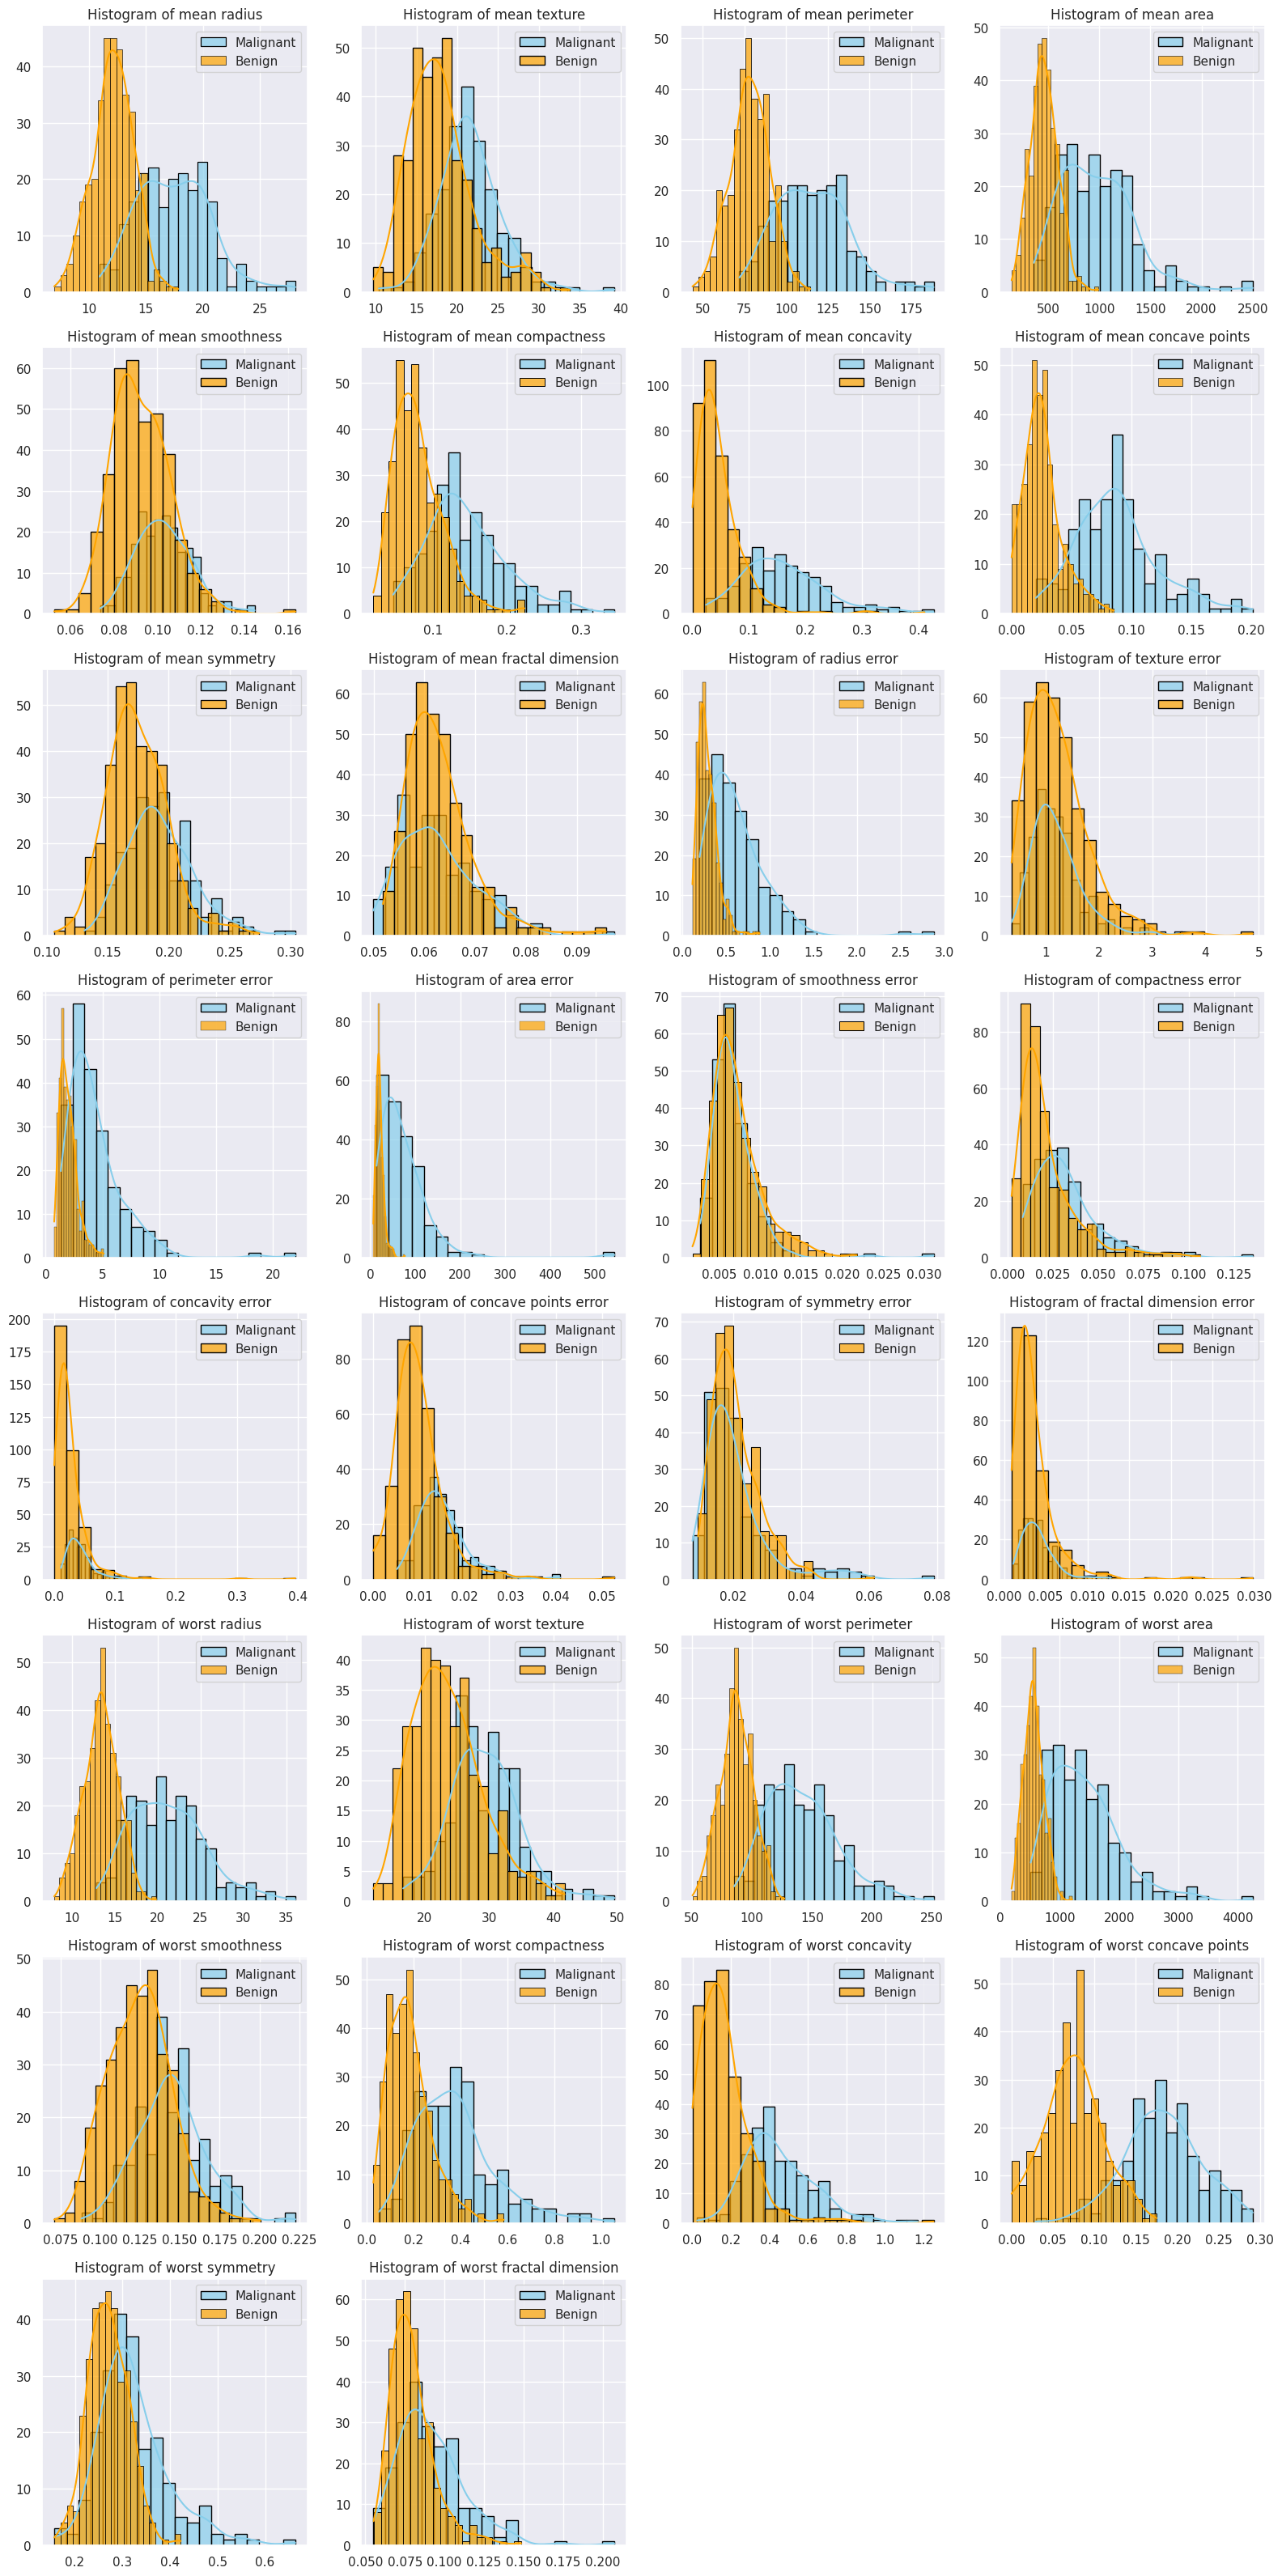

In [48]:
# Separate the dataset based on the target variable
class_0_data = df[df['target'] == 0]
class_1_data = df[df['target'] == 1]

# Calculate the number of rows and columns for subplots
n_features = len(df.columns) - 1
n_rows = (n_features - 1) // 4 + 1
n_cols = min(n_features, 4)

# Histograms for each feature, separated by class
plt.figure(figsize=(16, n_rows * 4))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(class_0_data[feature], kde=True, bins=20, color='skyblue', edgecolor='black', label='Malignant', alpha=0.7)
    sns.histplot(class_1_data[feature], kde=True, bins=20, color='orange', edgecolor='black', label='Benign', alpha=0.7)
    plt.title(f'Histogram of {feature}')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

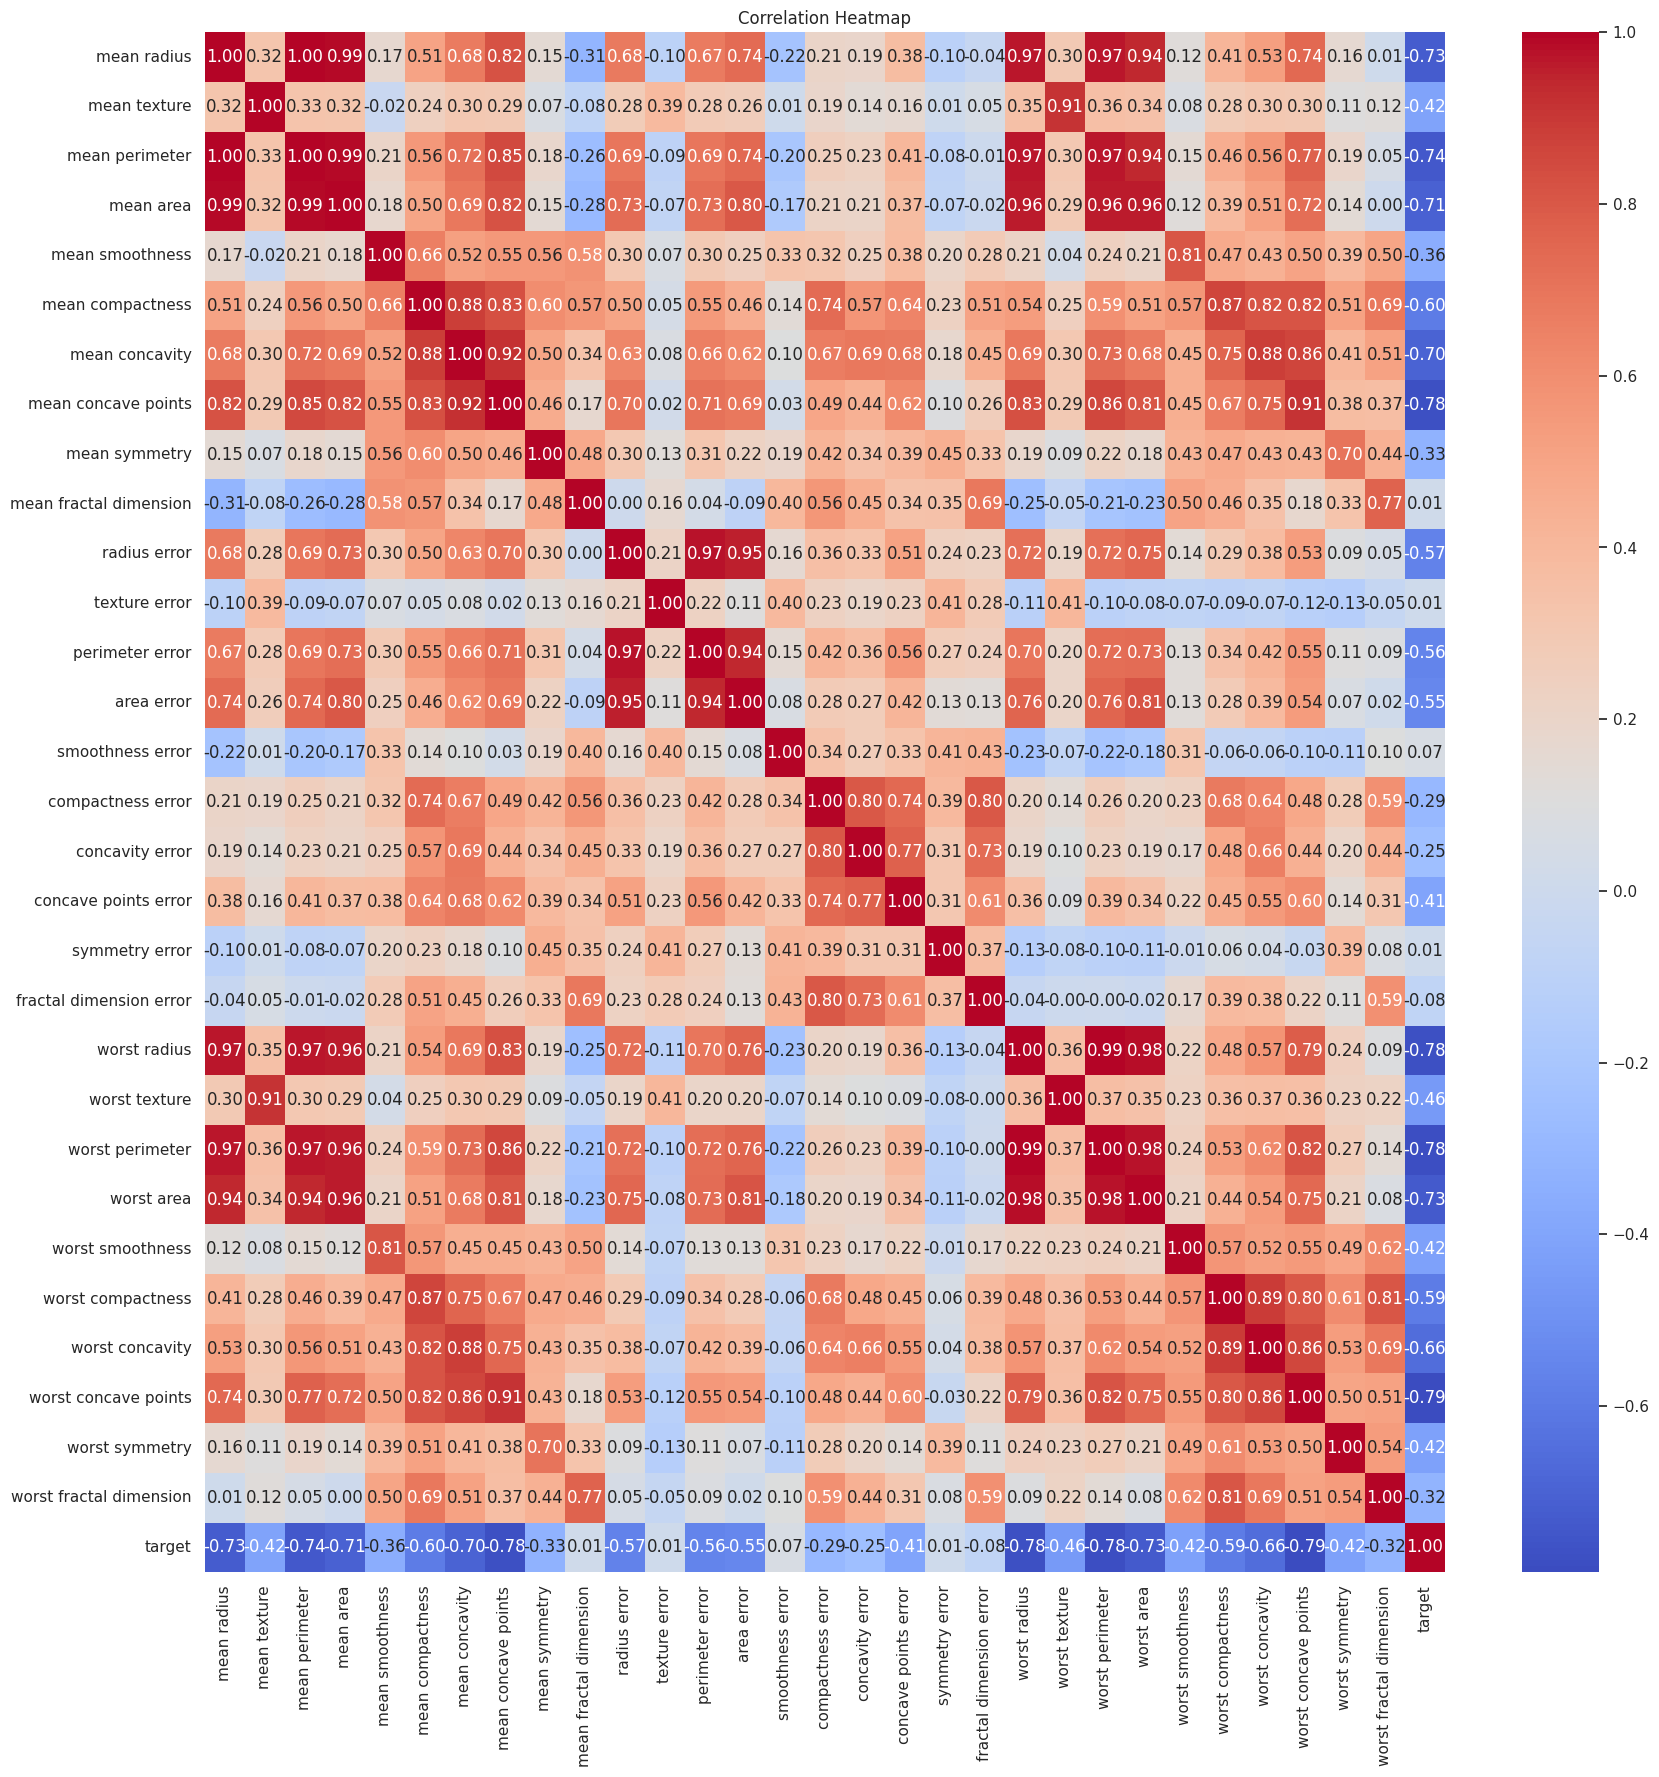

In [49]:
# Correlation heatmap for all features
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")

In [50]:
X = data.data #features (independent variables)
y = data.target #target variable (dependent variable)

In [51]:
# Split the data into training and testing sets

# test_size: Proportion of the dataset to include in the test split (20% in this case)
# random_state: Seed for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Building

In [52]:
class Perceptron(object):
    def __init__(self, eta, epochs):
        """
        Initialize a Perceptron object.

        Parameters:
        - eta: Learning rate
        - epochs: Number of training epochs
        """
        # Set the learning rate and number of epochs for training
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        """
        Train the perceptron on the given data.

        Parameters:
        - X: Input features
        - y: Target labels

        Returns:
        - Trained Perceptron object
        """
        # Initialize weights with random values
        self.w_ = np.random.rand(1 + X.shape[1])

        # List to store the number of misclassifications in each epoch
        self.errors_ = []

        # Loop through the specified number of epochs
        for _ in range(self.epochs):
            errors = 0
            # Iterate through each data point
            for xi, target in zip(X, y):
                # Update weights based on prediction error
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update * xi
                self.w_[-1] -= update
                errors += int(update != 0)

            # If there are no errors, training is complete
            if errors == 0:
                return self
            else:
                # Store the number of errors for this epoch
                self.errors_.append(errors)

        return self

    def net_input(self, X):
        """
        Calculate the net input (weighted sum) for a given set of features.

        Parameters:
        - X: Input features

        Returns:
        - Net input
        """
        # Calculate the dot product of input features and weights, add bias
        return np.dot(X, self.w_[:-1]) + self.w_[-1]

    def predict(self, X):
        """
        Make predictions based on the net input.

        Parameters:
        - X: Input features

        Returns:
        - Predicted class labels (1 or 0)
        """
        # Use a threshold to predict class labels (1 or 0)
        return np.where(self.net_input(X) >= 0.0, 1, 0)

Model Training

In [53]:
# Create an instance of the Perceptron class with specified learning rate and epochs
perceptron = Perceptron(eta=0.01, epochs=1000)

# Train the Perceptron on the training data
perceptron.train(X_train, y_train)

Model Evaluation

In [54]:
# Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Manual calculation of evaluation metrics
correct_predictions = sum(y_pred == y_test)
total_predictions = len(y_test)

# Accuracy calculation
accuracy = correct_predictions / total_predictions
accuracy = accuracy * 100

# True Positives, False Positives, False Negatives calculation
true_positives = sum((y_pred == 1) & (y_test == 1))
true_negatives = sum((y_pred == 0) & (y_test == 0))
false_positives = sum((y_pred == 1) & (y_test == 0))
false_negatives = sum((y_pred == 0) & (y_test == 1))

# Precision, Recall, F1-score calculation
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
precision = precision * 100
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
recall = recall * 100
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 95.61
Precision: 98.53
Recall: 94.37
F1 Score: 96.40


In [55]:
print(y_test == y_pred)

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True False  True]


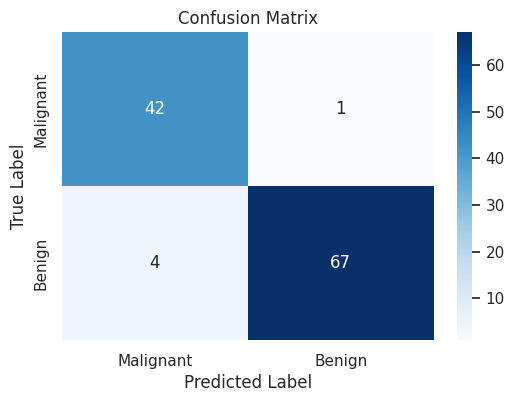

In [56]:
# Define the confusion matrix
confusion_matrix = [[true_negatives, false_positives],
                    [false_negatives, true_positives]]

# Set up the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Malignant", "Benign"],
            yticklabels=["Malignant", "Benign"])

# Set plot labels
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

#Conclusion

In summary, the classification model demonstrates excellent performance with an accuracy of 95.61%. The high precision of 98.53% indicates minimal false positives, crucial in medical applications. The model maintains a solid recall of 94.37%, ensuring effective identification of actual positive cases. The balanced F1 score of 96.40% underscores the model's reliability in distinguishing between malignant and benign tumors. These results affirm the model's potential for accurate medical diagnosis, providing a valuable tool for healthcare practitioners.